In [1]:
import os
import cv2
import tqdm
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import seamcarving as sc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


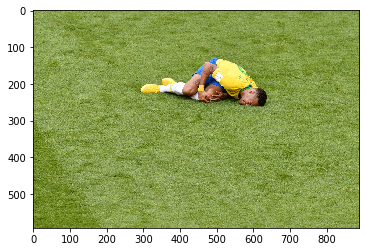

In [2]:
# load image
image_name = "football.png"
image_path = os.path.join("images", image_name)
image = sc.load_image(image_path)
image = cv2.resize(image, dsize=None, fx=0.3, fy=0.3)
sc.show_image_plt(image)

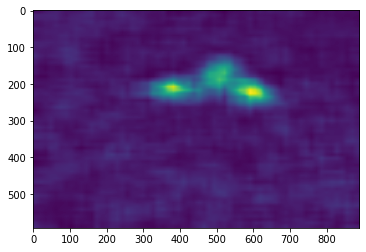

In [3]:
# saliency
sc.show_image_plt(sc.static_saliency(image))

100%|██████████| 300/300 [00:14<00:00, 21.28it/s]


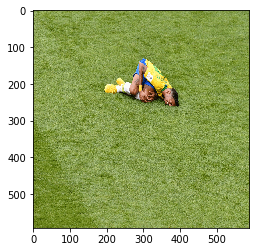

In [6]:
# remove seams normally
current_image = np.copy(image)
for i in tqdm.tqdm(range(300)):
    current_energy = sc.laplacian_energy(current_image)
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.remove_seam(current_image, current_seam)
sc.show_image_plt(current_image)

100%|██████████| 300/300 [00:14<00:00, 20.79it/s]


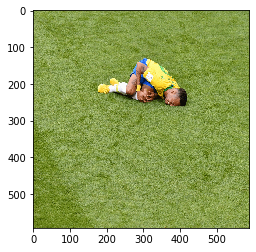

In [7]:
# remove with saliency protection
current_image = np.copy(image)
for i in tqdm.tqdm(range(300)):
    current_energy = sc.laplacian_energy(current_image)
    current_saliency = sc.static_saliency(current_image)
    current_energy = current_energy * current_saliency
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.remove_seam(current_image, current_seam)
sc.show_image_plt(current_image)